In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# Path to the CSV file
csv_file_path = 'test_data.csv'

# Read the data from the CSV file
df = pd.read_csv(csv_file_path)

# Convert 'time' from milliseconds to seconds for plotting
df['time_seconds'] = df['time'] / 1000



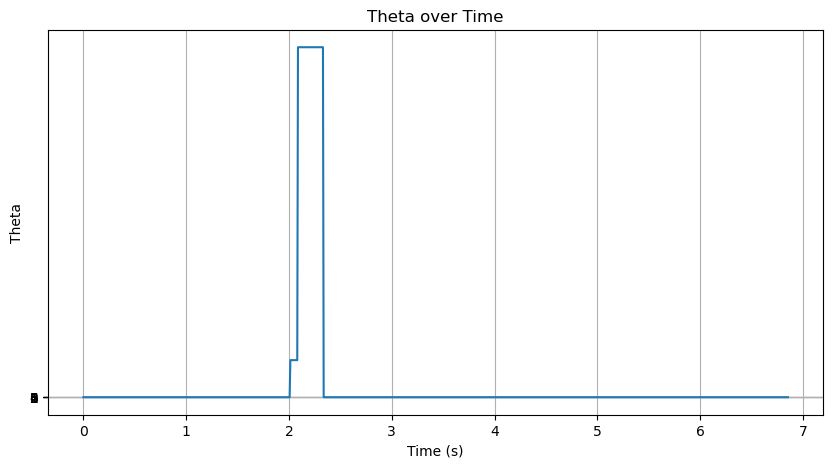

In [6]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df['time_seconds'], df['theta'])
plt.xlabel('Time (s)')
plt.ylabel('Theta')
plt.title('Theta over Time')
plt.grid(True)

# Set the y-axis labels to display every second
plt.yticks(range(0, int(df['time_seconds'].max()) + 1, 1))

# Show the plot
plt.show()


In [7]:
from filterpy.kalman import KalmanFilter

In [8]:
# filter data of theta

theta = df['theta'].values


kf = KalmanFilter(dim_x=1, dim_z=1)  # 1 state variable, 1 measurement

kf.F = np.array([[1]])  # State transition matrix
kf.H = np.array([[1]])  # Measurement function

kf.Q = np.array([[0.001]])  # Process noise covariance
kf.R = np.array([[0.1]])   # Measurement noise covariance
kf.P = np.array([[1]])     # Initial covariance matrix

kf.x = np.array([[0]])  # Initial state (e.g., starting at 0)


# measurements = [5, 6, 7, 9, 10, 12]  # Example noisy data
predictions = []

for t in theta:
    kf.predict()  # Predict next state
    kf.update(t)  # Update with new measurement
    predictions.append(kf.x[0, 0])  # Store filtered value

# print("Filtered data:", predictions)

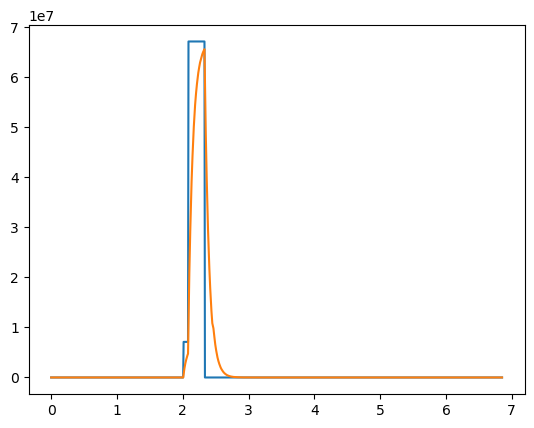

In [9]:
plt.plot(df['time_seconds'], df['theta'])
plt.plot(df['time_seconds'], predictions)

In [10]:
# Kalman filter implementation
def Kalman_filter(F, H, Q, R, x_init, P_init, measurements):
    N = len(measurements)  # Number of time steps
    # N = measurements.shape[1]
    x = x_init  # Initialize state estimate
    P = P_init  # Initialize error covariance
    x_estimates = np.zeros((x.shape[0], N))  # Store state estimates
    P_estimates = []    # List to store error covariance matrices


    for t in range(N):
        # Prediction step
        x_pred = F @ x                      # Predicted state
        P_pred = F @ P @ F.T + Q            # Predicted error covariance

        # Measurement update
        y = measurements[t]                                     # Current measurement
        K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)  # Kalman Gain
        x = x_pred + K @ (y - H @ x_pred)                       # Update state estimate
        P = (np.eye(P.shape[0]) - K @ H) @ P_pred               # Update error covariance

        # Save the estimate
        x_estimates[:, t] = x.flatten()
        P_estimates.append(P)

    return x_estimates.flatten(), P_estimates

# applying moving average on output data of kalman filter
def moving_average(data, window_size):
    cumsum = np.cumsum(data)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size


In [11]:
# Parameters
F = np.array([[1]])  # State transition matrix (assume constant acceleration)
H = np.array([[1]])  # Measurement matrix (direct measurement of state)
Q = np.array([[0.001]])  # Process noise covariance (system uncertainty)
R = np.array([[0.1]])  # Measurement noise covariance (sensor uncertainty)
x_init = np.array([[0]])  # Initial state estimate (e.g., acceleration)
P_init = np.array([[1]])  # Initial error covariance

output_kalman, _ = Kalman_filter(F, H, Q, R, x_init, P_init, theta)

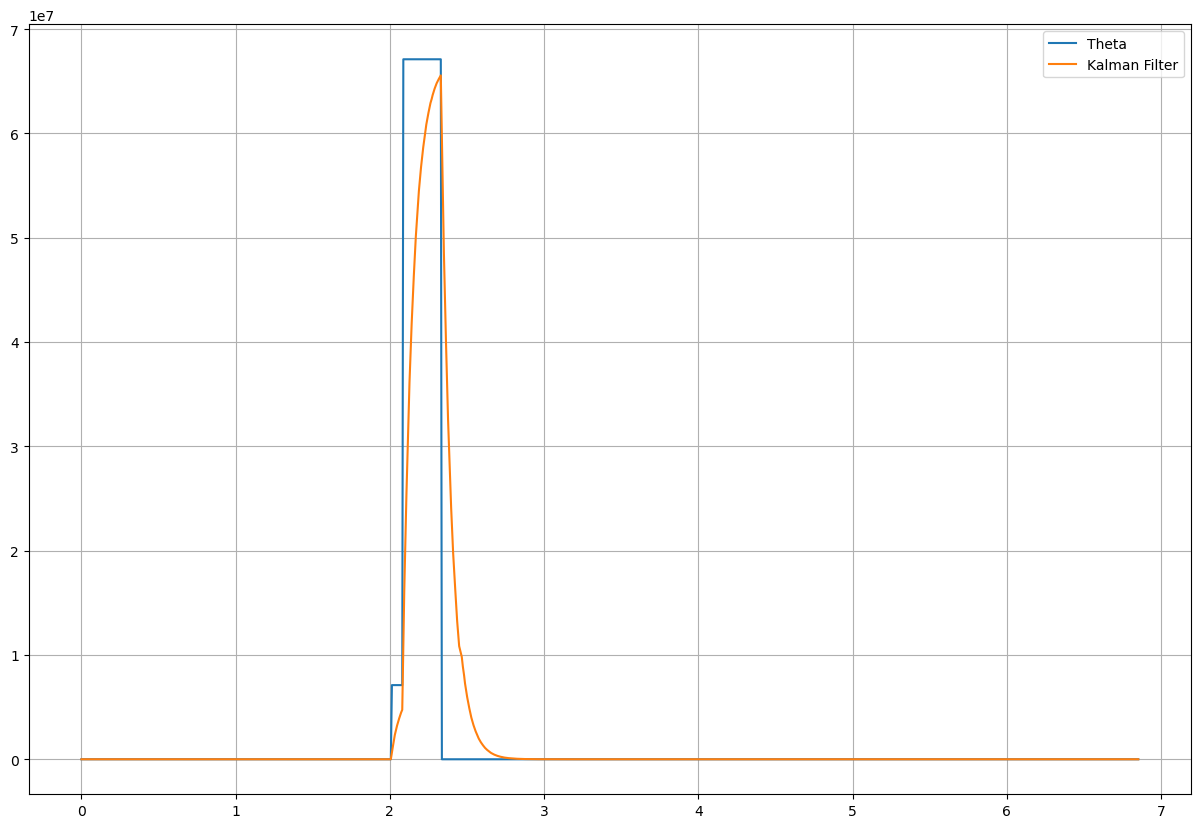

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'], df['theta'], label='Theta')
ax.plot(df['time_seconds'], output_kalman, label='Kalman Filter')
ax.legend()
plt.grid(True)
plt.show()
# plt.plot(df['time_seconds'], df['theta'])
# plt.plot(df['time_seconds'], output_kalman)
# plt.plot(df['time_seconds'], predictions)

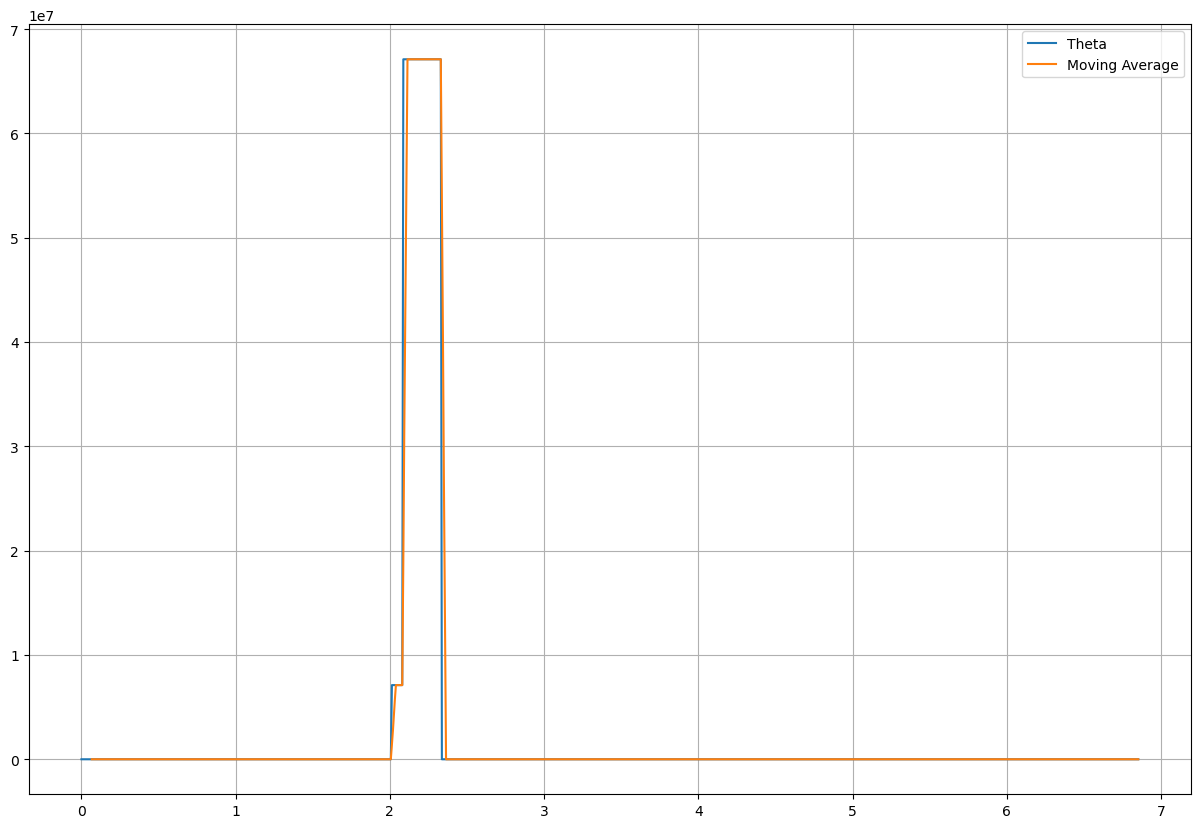

In [13]:
moving_average_theta = moving_average(theta, 5)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'], df['theta'], label='Theta')
ax.plot(df['time_seconds'][4:], moving_average_theta, label='Moving Average')
ax.legend()
plt.grid(True)
plt.show()
# plt.plot(df['time_seconds'][4:], df['theta'][4:])
# plt.plot(df['time_seconds'][4:], moving_average_theta)



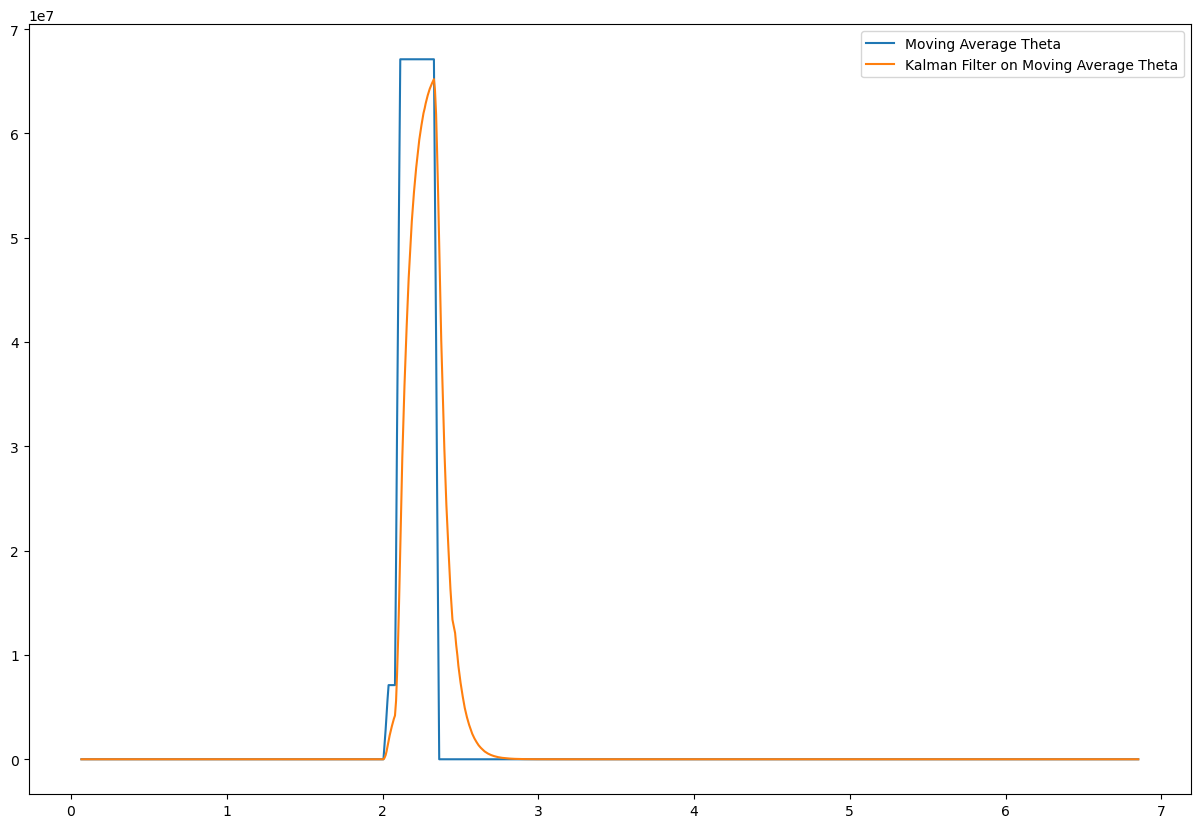

In [14]:
output_kalman1, _ = Kalman_filter(F, H, Q, R, x_init, P_init, moving_average_theta)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'][4:], moving_average_theta, label='Moving Average Theta')
ax.plot(df['time_seconds'][4:], output_kalman1, label='Kalman Filter on Moving Average Theta')
ax.legend()
plt.show()


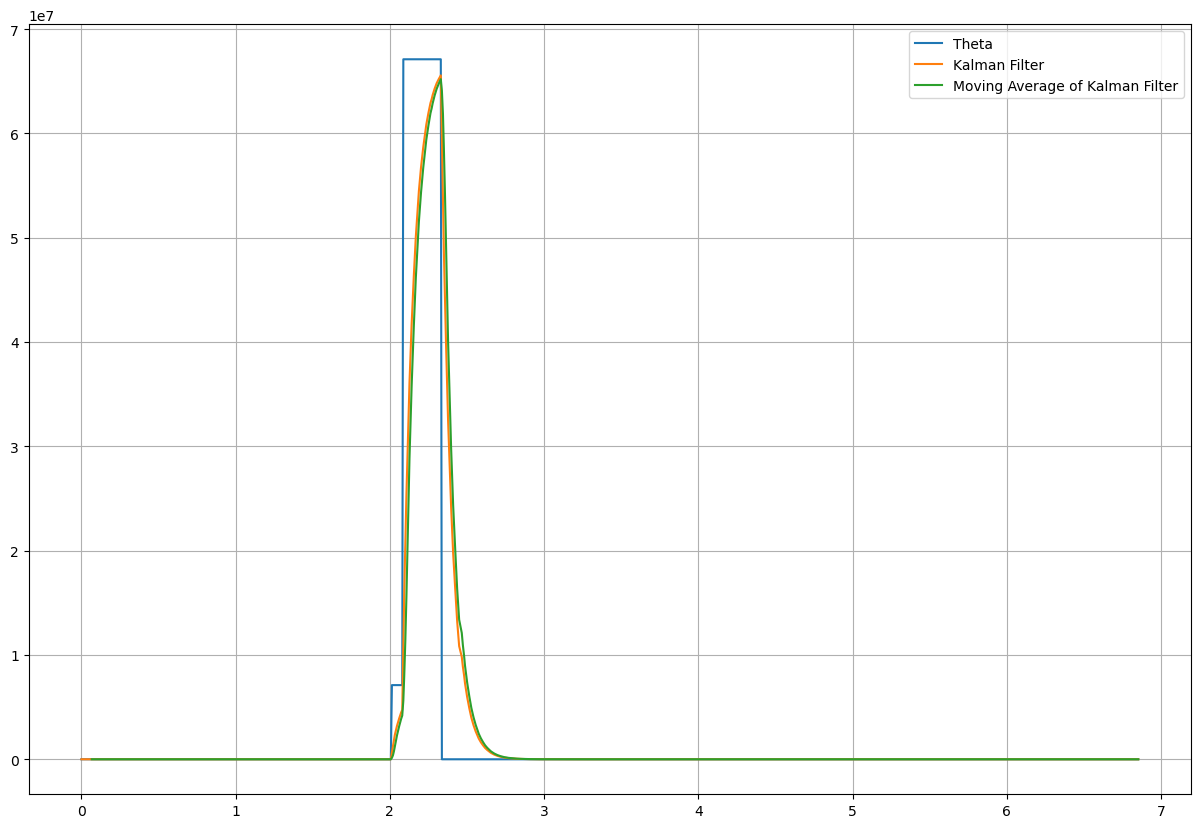

In [15]:


output_kalman_moving_avg = moving_average(output_kalman, 5)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df['time_seconds'], df['theta'], label='Theta')
ax.plot(df['time_seconds'], output_kalman, label='Kalman Filter')
ax.plot(df['time_seconds'][4:], output_kalman_moving_avg, label='Moving Average of Kalman Filter')
ax.legend()
plt.grid(True)
plt.show()

In [16]:
df = pd.read_csv('/Users/alishirazi/Desktop/Master SSE/Smart Systems/Github/pendulum-Lab-Class/180_theta_1.csv')

In [17]:
df.head()

,xAccl,yAccl,zAccl,newPosition,time,pcTime
0,986,-18,-139,0,346578,440.011024
1,1004,-9,-20,0,371496,464.955807
2,852,33,187,0,396496,490.056992
3,977,-134,298,0,421500,514.984846
4,498,88,594,0,446507,540.004730


In [18]:

df['delta_time'] = df['pcTime'].diff()
# add new time column to df

df.head(10)

,xAccl,yAccl,zAccl,newPosition,time,pcTime,delta_time
0,986,-18,-139,0,346578,440.011024,NaN
1,1004,-9,-20,0,371496,464.955807,24.944782
2,852,33,187,0,396496,490.056992,25.101185
3,977,-134,298,0,421500,514.984846,24.927855
4,498,88,594,0,446507,540.004730,25.019884
5,316,109,787,0,471510,564.953804,24.949074
6,-77,83,873,0,496515,590.039015,25.085211
7,-139,-6,866,0,521521,614.953995,24.914980
8,-486,-16,756,0,546522,640.062809,25.108814
9,-803,245,637,0,571525,664.983034,24.920225


In [19]:
acc_x = df['xAccl'].values
acc_y = df['yAccl'].values
acc_z = df['zAccl'].values
time = df['time'].values

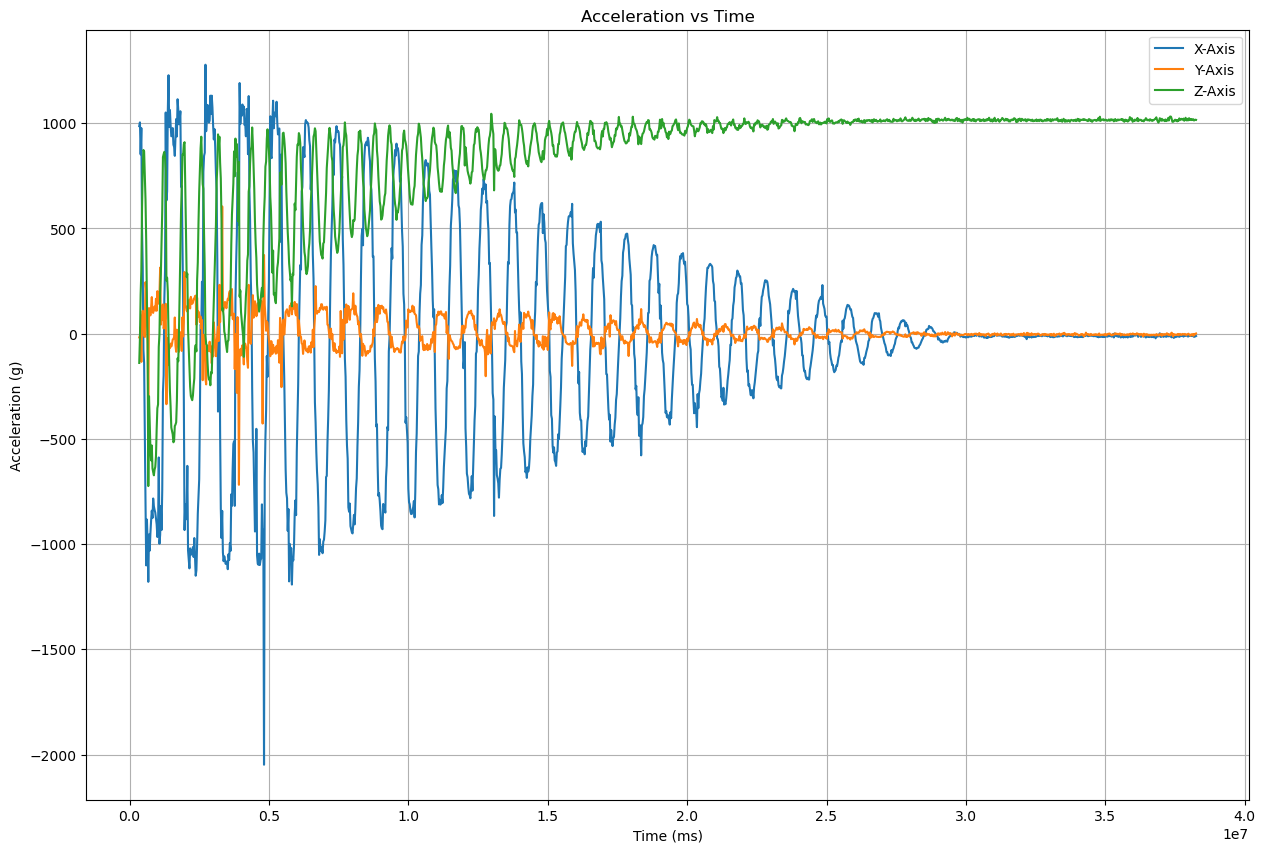

In [20]:

plt.figure(figsize=(15, 10))
plt.plot(time, acc_x, label='X-Axis')
plt.plot(time, acc_y, label='Y-Axis')
plt.plot(time, acc_z, label='Z-Axis')
plt.xlabel('Time (ms)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration vs Time')
plt.legend(['X-Axis', 'Y-Axis', 'Z-Axis'])
plt.grid(True)
plt.show()
# Plot the data


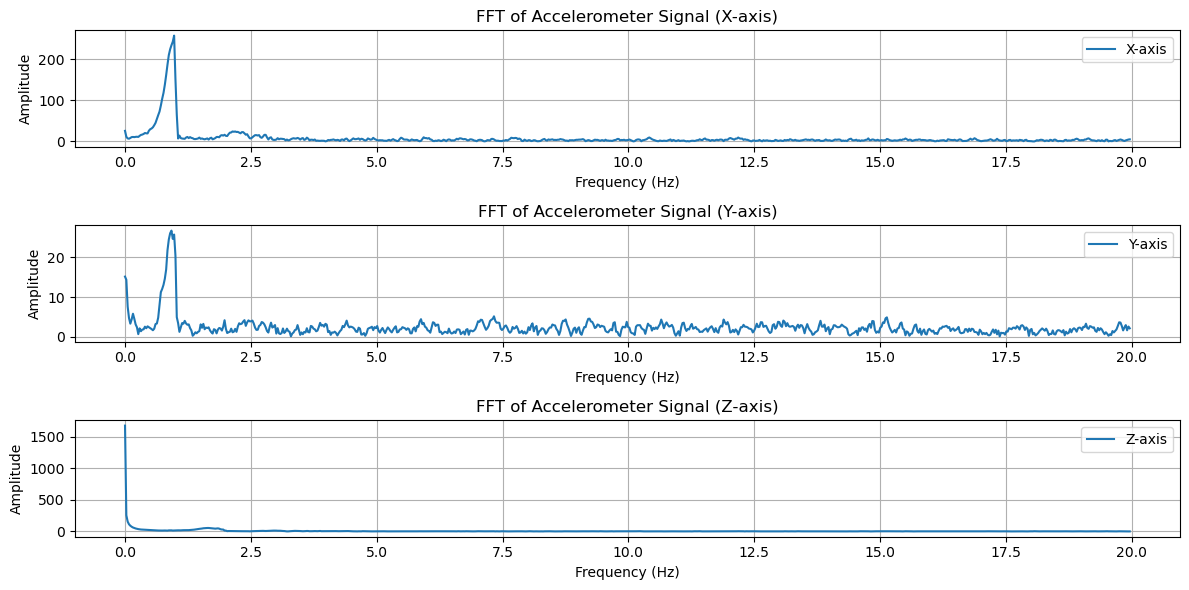

In [23]:
# import fft to transform my signal
from scipy.fft import fft, fftfreq

fs = 40 # Sampling frequency (Hz)

# Number of sample points
N = len(acc_x)
# Sample spacing
T = 1.0 / fs
# Compute the FFT
yf_x = fft(acc_x)
yf_y = fft(acc_y)
yf_z = fft(acc_z)
xf = fftfreq(N, T)[:N // 2]

# Plot the FFT
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

# Plot FFT for X-axis
ax[0].plot(xf, 2.0 / N * np.abs(yf_x[:N // 2]), label='X-axis')
ax[0].set_title('FFT of Accelerometer Signal (X-axis)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()

# Plot FFT for Y-axis
ax[1].plot(xf, 2.0 / N * np.abs(yf_y[:N // 2]), label='Y-axis')
ax[1].set_title('FFT of Accelerometer Signal (Y-axis)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].legend()

# Plot FFT for Z-axis
ax[2].plot(xf, 2.0 / N * np.abs(yf_z[:N // 2]), label='Z-axis')
ax[2].set_title('FFT of Accelerometer Signal (Z-axis)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[2].legend()

plt.tight_layout()
plt.show()

now lets apply low pas filter, sample rate is 25ms, by knowing this, frequency will be 40hz

In [24]:
from scipy.signal import butter, filtfilt

In [25]:
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

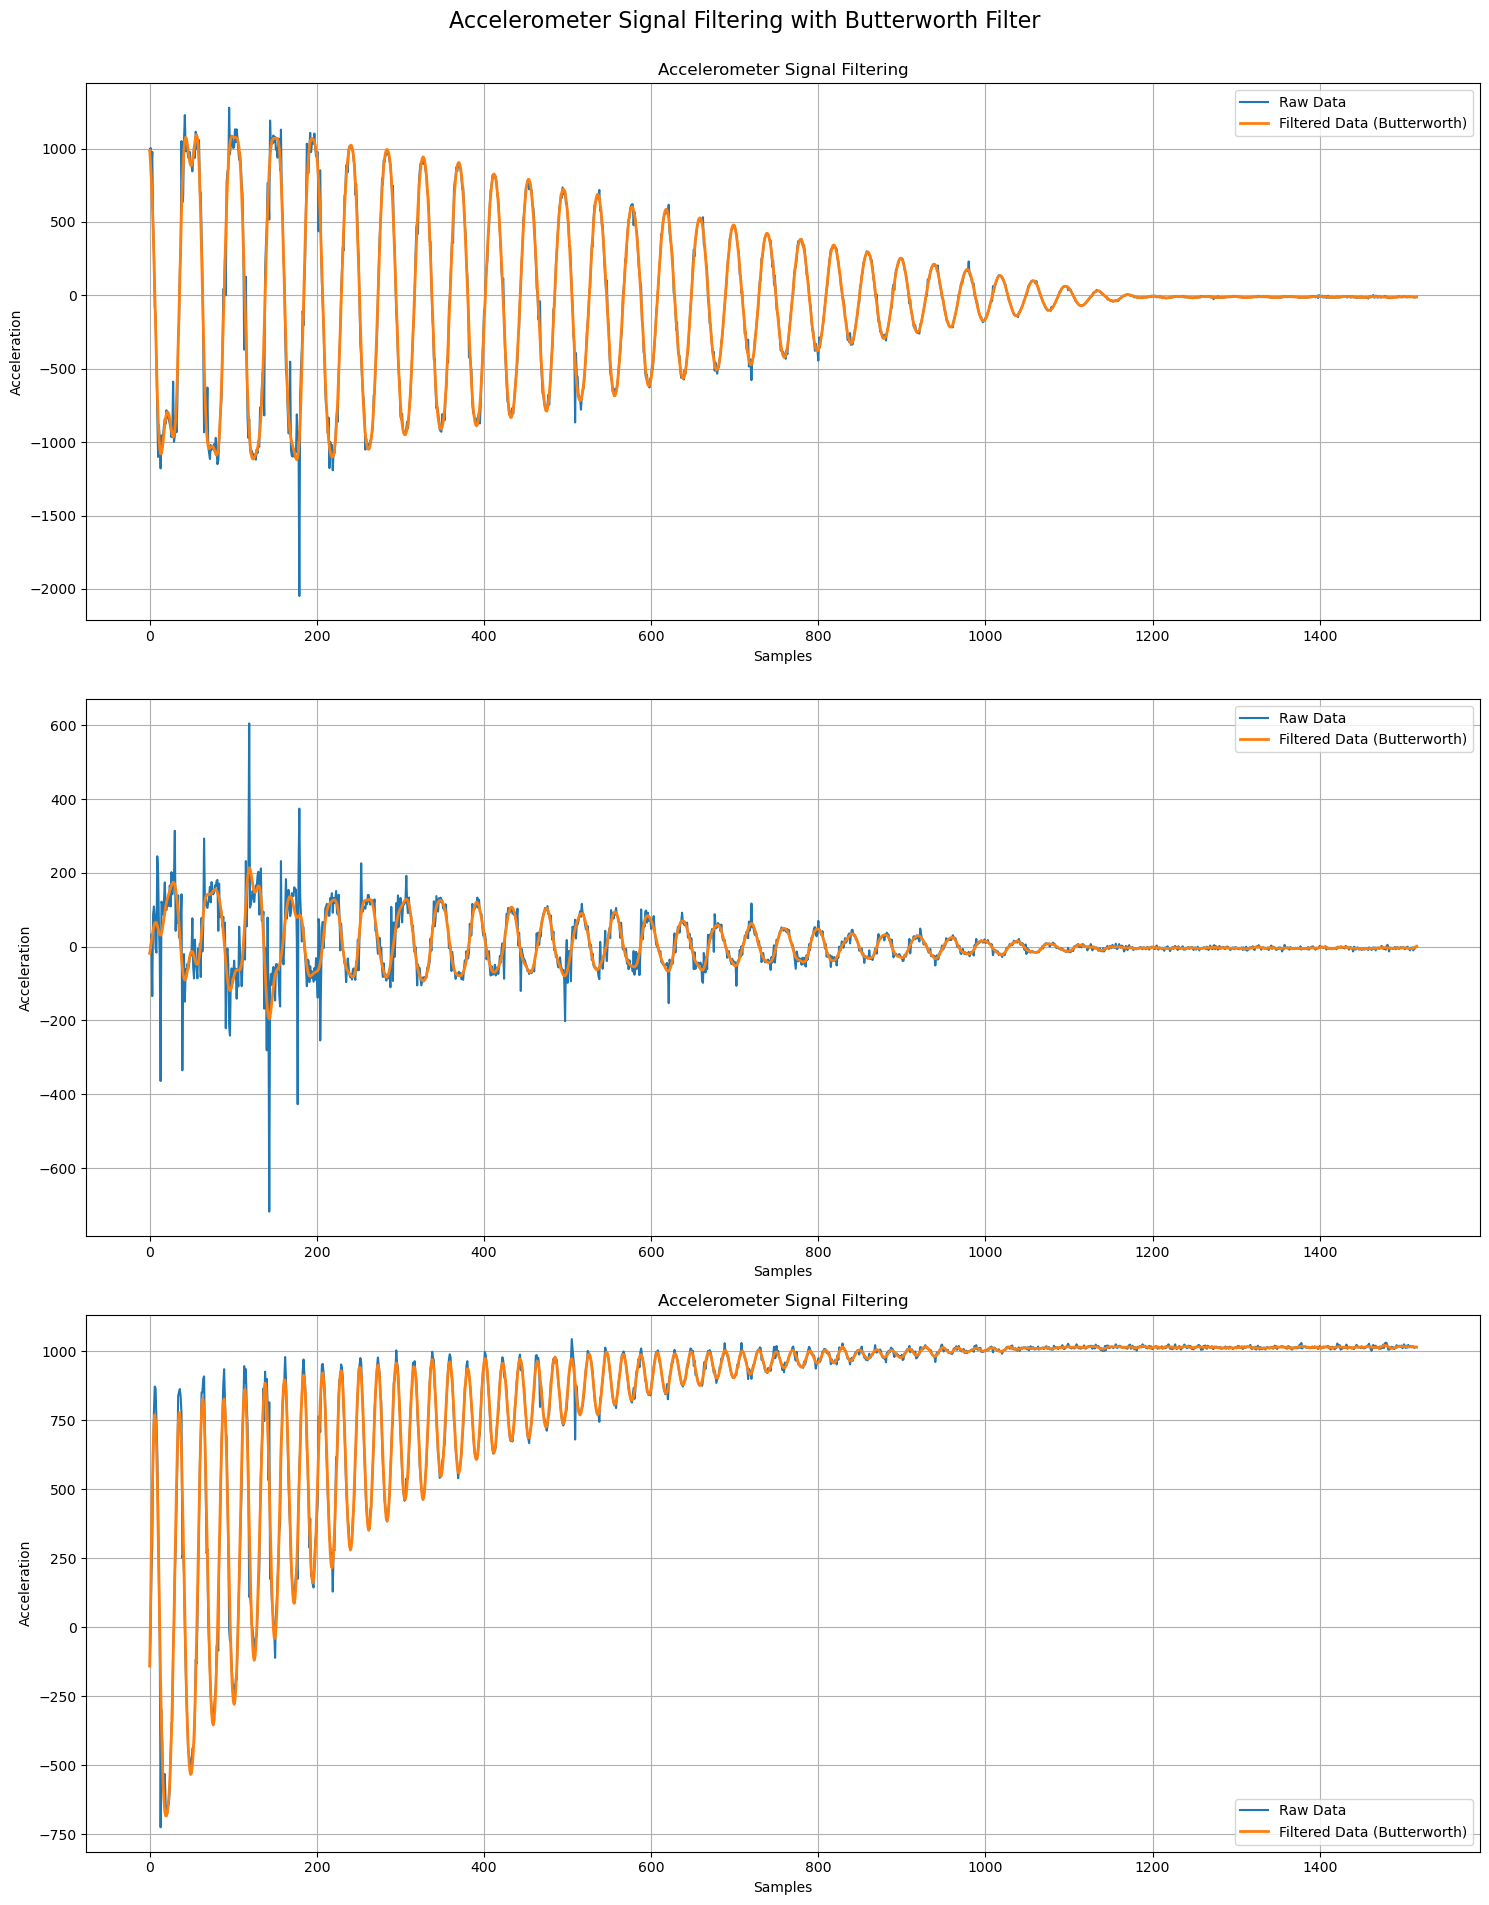

In [35]:

# Define your signal and sampling info
acc_x = df['xAccl']  # Replace with actual column name
acc_y = df['yAccl']
acc_z = df['zAccl']
fs = 40  # 40 Hz sampling rate
cutoff = 3  # Filter out everything above 5 Hz

# Apply filter
filtered_acc_x = butter_lowpass_filter(acc_x, cutoff, fs)
filtered_acc_y = butter_lowpass_filter(acc_y, cutoff, fs)
filtered_acc_z = butter_lowpass_filter(acc_z, cutoff, fs)

# Plot the result
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

ax[0].plot(acc_x, label='Raw Data')
ax[0].plot(filtered_acc_x, label='Filtered Data (Butterworth)', linewidth=2)
ax[0].legend()
ax[0].set_title('Accelerometer Signal Filtering')
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Acceleration')
ax[0].grid(True)

ax[1].plot(acc_y, label='Raw Data')
ax[1].plot(filtered_acc_y, label='Filtered Data (Butterworth)', linewidth=2)
ax[1].legend()
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Acceleration')
ax[1].grid(True)

ax[2].plot(acc_z, label='Raw Data')
ax[2].plot(filtered_acc_z, label='Filtered Data (Butterworth)', linewidth=2)
ax[2].legend()
ax[2].set_xlabel('Samples')
ax[2].set_ylabel('Acceleration')
ax[2].grid(True)
ax[2].set_title('Accelerometer Signal Filtering')

plt.suptitle('Accelerometer Signal Filtering with Butterworth Filter', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])  # Adjust layout to make room for the title
plt.show()

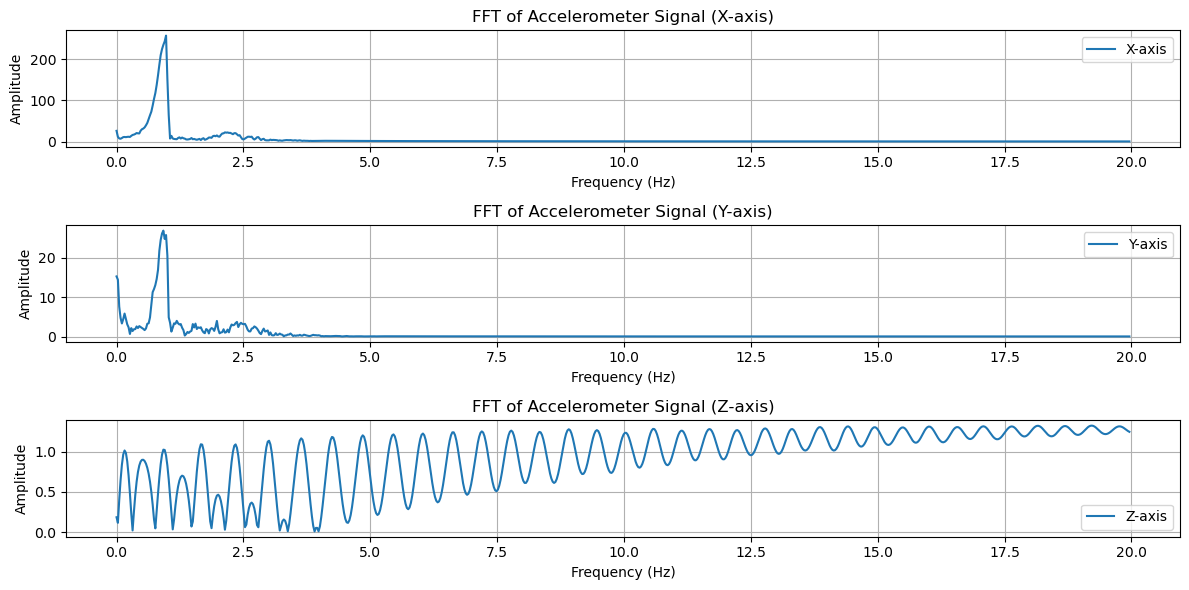

In [27]:
# import fft to transform my signal
from scipy.fft import fft, fftfreq

# Number of sample points
N = len(acc_x)
# Sample spacing
T = 1.0 / fs

# Compute the FFT for filtered data
yf_x_filtered = fft(filtered_acc_x)
yf_y_filtered = fft(filtered_acc_y)
yf_z_filtered = fft(filtered_acc_z)

# Compute the FFT
xf = fftfreq(N, T)[:N // 2]

# Plot the FFT
fig, ax = plt.subplots(3, 1, figsize=(12, 6))

# Plot FFT for X-axis
ax[0].plot(xf, 2.0 / N * np.abs(yf_x_filtered[:N // 2]), label='X-axis')
ax[0].set_title('FFT of Accelerometer Signal (X-axis)')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()
ax[0].legend()

# Plot FFT for Y-axis
ax[1].plot(xf, 2.0 / N * np.abs(yf_y_filtered[:N // 2]), label='Y-axis')
ax[1].set_title('FFT of Accelerometer Signal (Y-axis)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')
ax[1].grid()
ax[1].legend()

# Plot FFT for Z-axis
ax[2].plot(xf, 2.0 / N * np.abs(filtered_acc_z[:N // 2]), label='Z-axis')
ax[2].set_title('FFT of Accelerometer Signal (Z-axis)')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude')
ax[2].grid()
ax[2].legend()

plt.tight_layout()
plt.show()

In [28]:
# Simple 1D Kalman Filter applied to each axis
def kalman_filter_1d(data, Q, R):
    n = len(data)
    x = data[0]  # initial state estimate
    P = 1.0      # initial estimate error
    result = [x]

    for i in range(1, n):
        z = data[i]

        # Predict
        P = P + Q

        # Update
        K = P / (P + R)
        x = x + K * (z - x)
        P = (1 - K) * P

        result.append(x)

    return np.array(result)

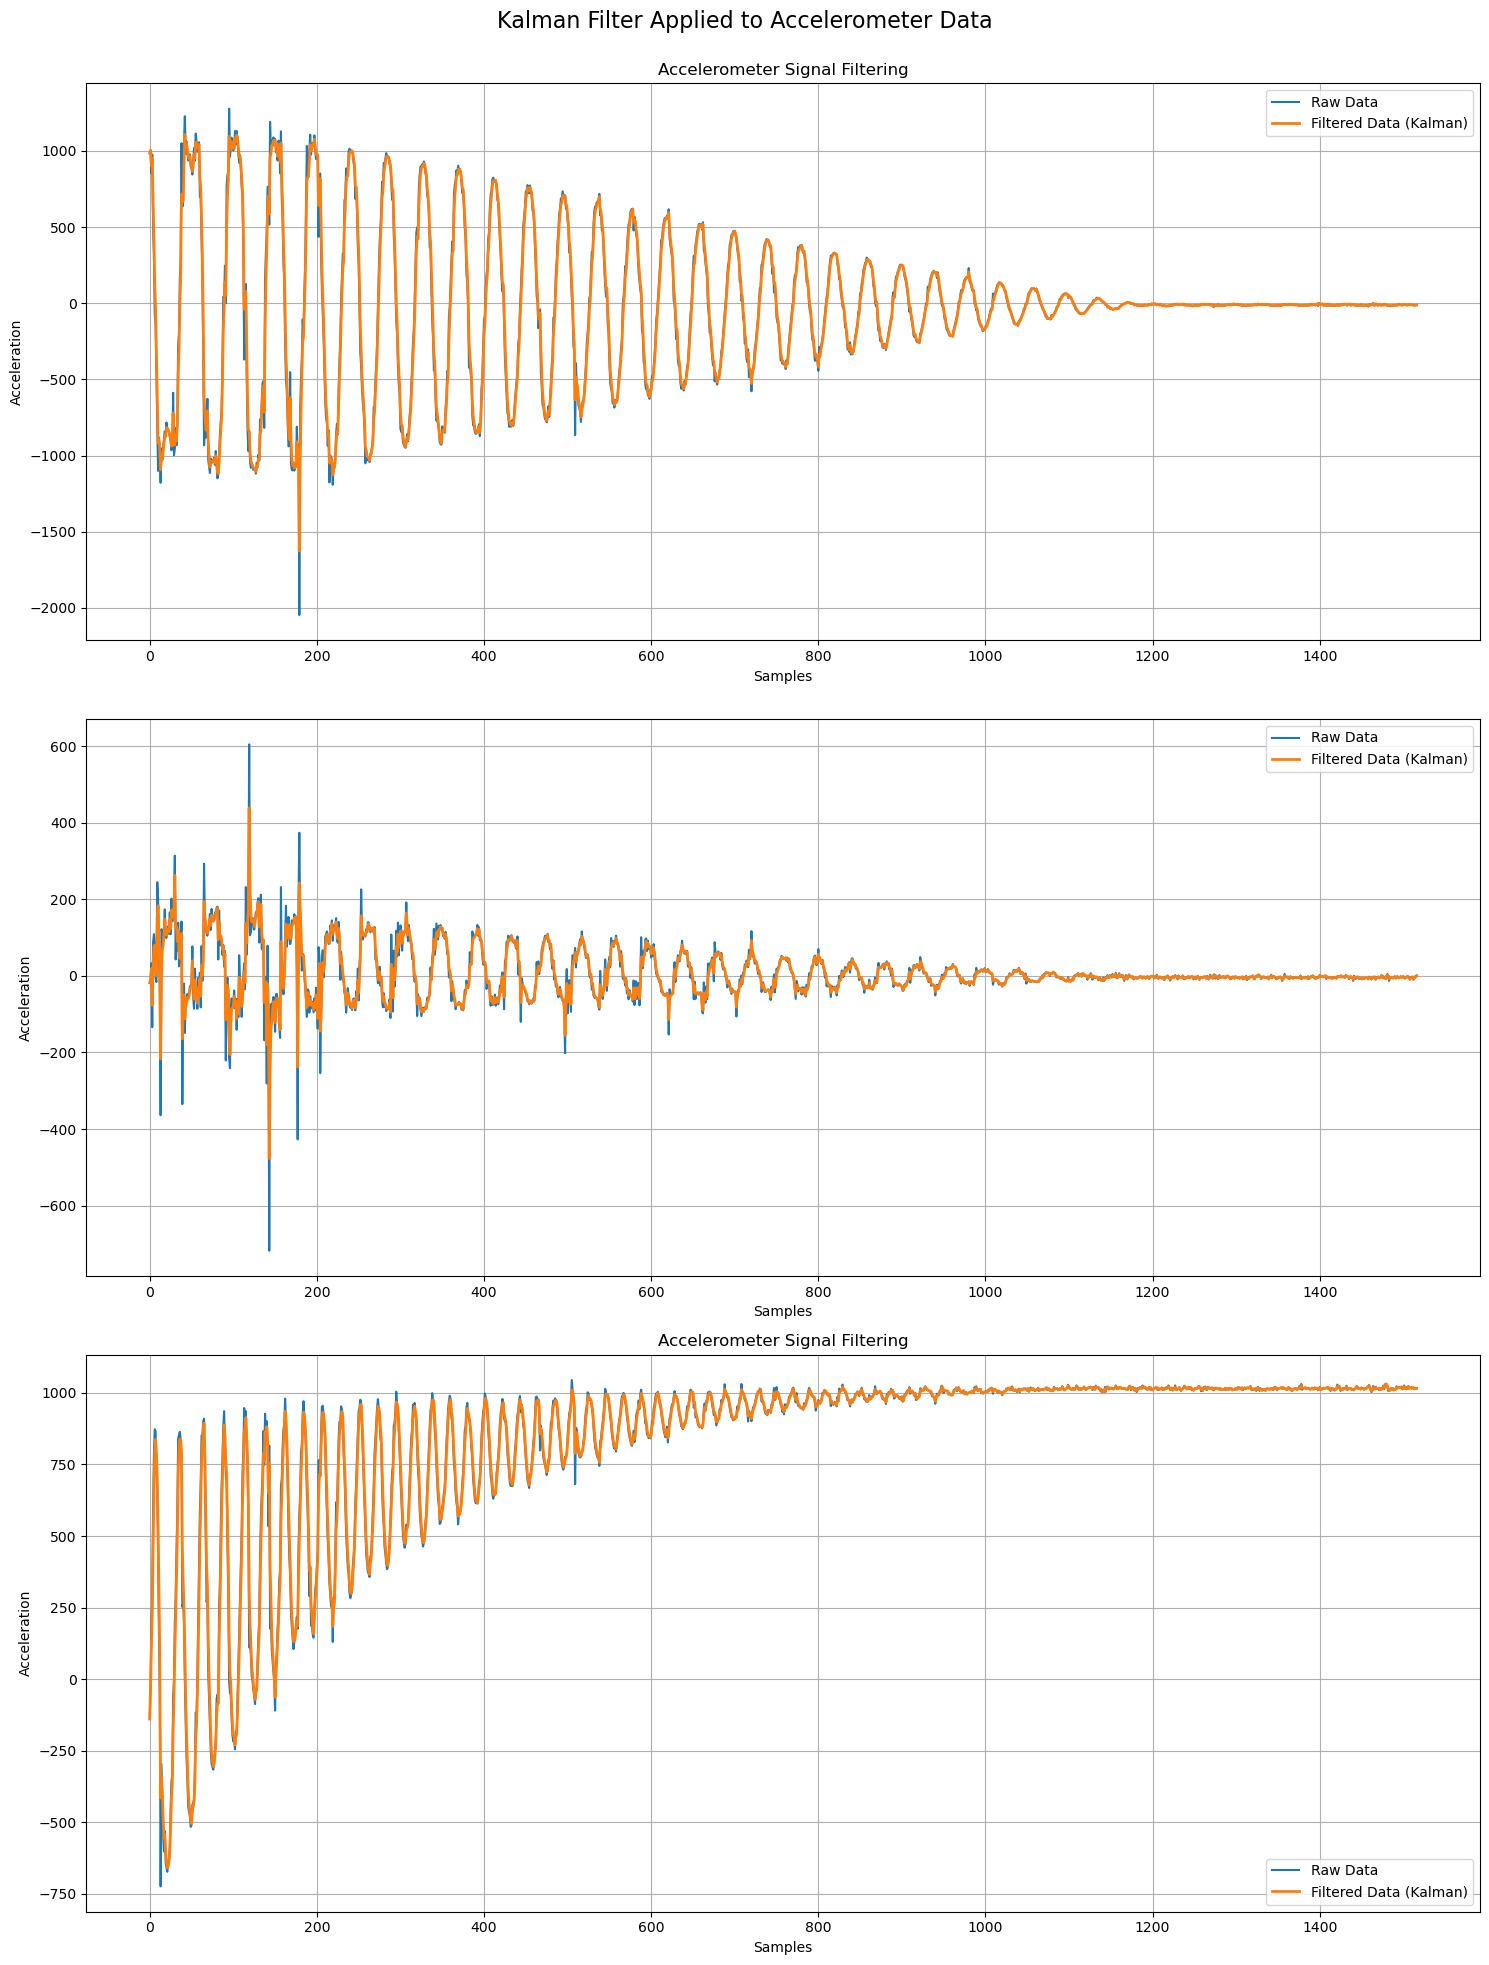

In [33]:
Q = 0.01  # Process noise covariance
R = 0.01   # Measurement noise covariance

# Apply Kalman filter to xAccl, yAccl, and zAccl
x_kalman = kalman_filter_1d(df['xAccl'].values, Q, R)
y_kalman = kalman_filter_1d(df['yAccl'].values, Q, R)
z_kalman = kalman_filter_1d(df['zAccl'].values, Q, R)

# Plot the result
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

ax[0].plot(acc_x, label='Raw Data')
ax[0].plot(x_kalman, label='Filtered Data (Kalman)', linewidth=2)
ax[0].legend()
ax[0].set_title('Accelerometer Signal Filtering')
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Acceleration')
ax[0].grid(True)

ax[1].plot(acc_y, label='Raw Data')
ax[1].plot(y_kalman, label='Filtered Data (Kalman)', linewidth=2)
ax[1].legend()
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Acceleration')
ax[1].grid(True)

ax[2].plot(acc_z, label='Raw Data')
ax[2].plot(z_kalman, label='Filtered Data (Kalman)', linewidth=2)
ax[2].legend()
ax[2].set_xlabel('Samples')
ax[2].set_ylabel('Acceleration')
ax[2].grid(True)
ax[2].set_title('Accelerometer Signal Filtering')

plt.suptitle('Kalman Filter Applied to Accelerometer Data', fontsize=16)
plt.tight_layout( rect=[0, 0, 1, 0.98])
plt.show()



In [ ]:
from filterpy.kalman import ExtendedKalmanFilter
from filterpy.kalman import UnscentedKalmanFilter as UKF
from filterpy.kalman import MerweScaledSigmaPoints

In [ ]:


# Define how state evolves (prediction)
def fx(x, dt=1):
    return x  # Assume constant acceleration

# Define how measurements are related to state (identity here)
def hx(x):
    return x

def ekf_filter(data):
    ekf = ExtendedKalmanFilter(dim_x=1, dim_z=1)
    ekf.x = np.array([data[0]])  # initial state
    ekf.F = np.array([[1]])      # state transition (identity)
    ekf.H = np.array([[1]])      # measurement function
    ekf.P = np.array([[0.1]])   # state covariance (ensure it's a square matrix)
    ekf.R = np.array([[0.01]])      # measurement noise (ensure it's a square matrix)
    ekf.Q = np.array([[0.01]])   # process noise (ensure it's a square matrix)

    filtered = []
    for z in data:
        ekf.predict_update(z, hx, fx)
        filtered.append(ekf.x[0])
    return filtered



In [90]:


def fx(x, dt):  # process model
    return x

def hx(x):      # measurement model
    return x

def ukf_filter(data):
    points = MerweScaledSigmaPoints(n=1, alpha=0.1, beta=2., kappa=1)
    ukf = UKF(dim_x=1, dim_z=1, fx=fx, hx=hx, dt=1, points=points)
    ukf.x = np.array([data[0]])  # initial state
    ukf.P = np.array([[0.01]])   # initial error covariance (ensure it's a square matrix)
    ukf.R = np.array([[0.01]])      # measurement noise (ensure it's a square matrix)
    ukf.Q = np.array([[0.005]])   # process noise (ensure it's a square matrix)

    filtered = []
    for z in data:
        ukf.predict()
        ukf.update(z)
        filtered.append(ukf.x[0])
    return filtered


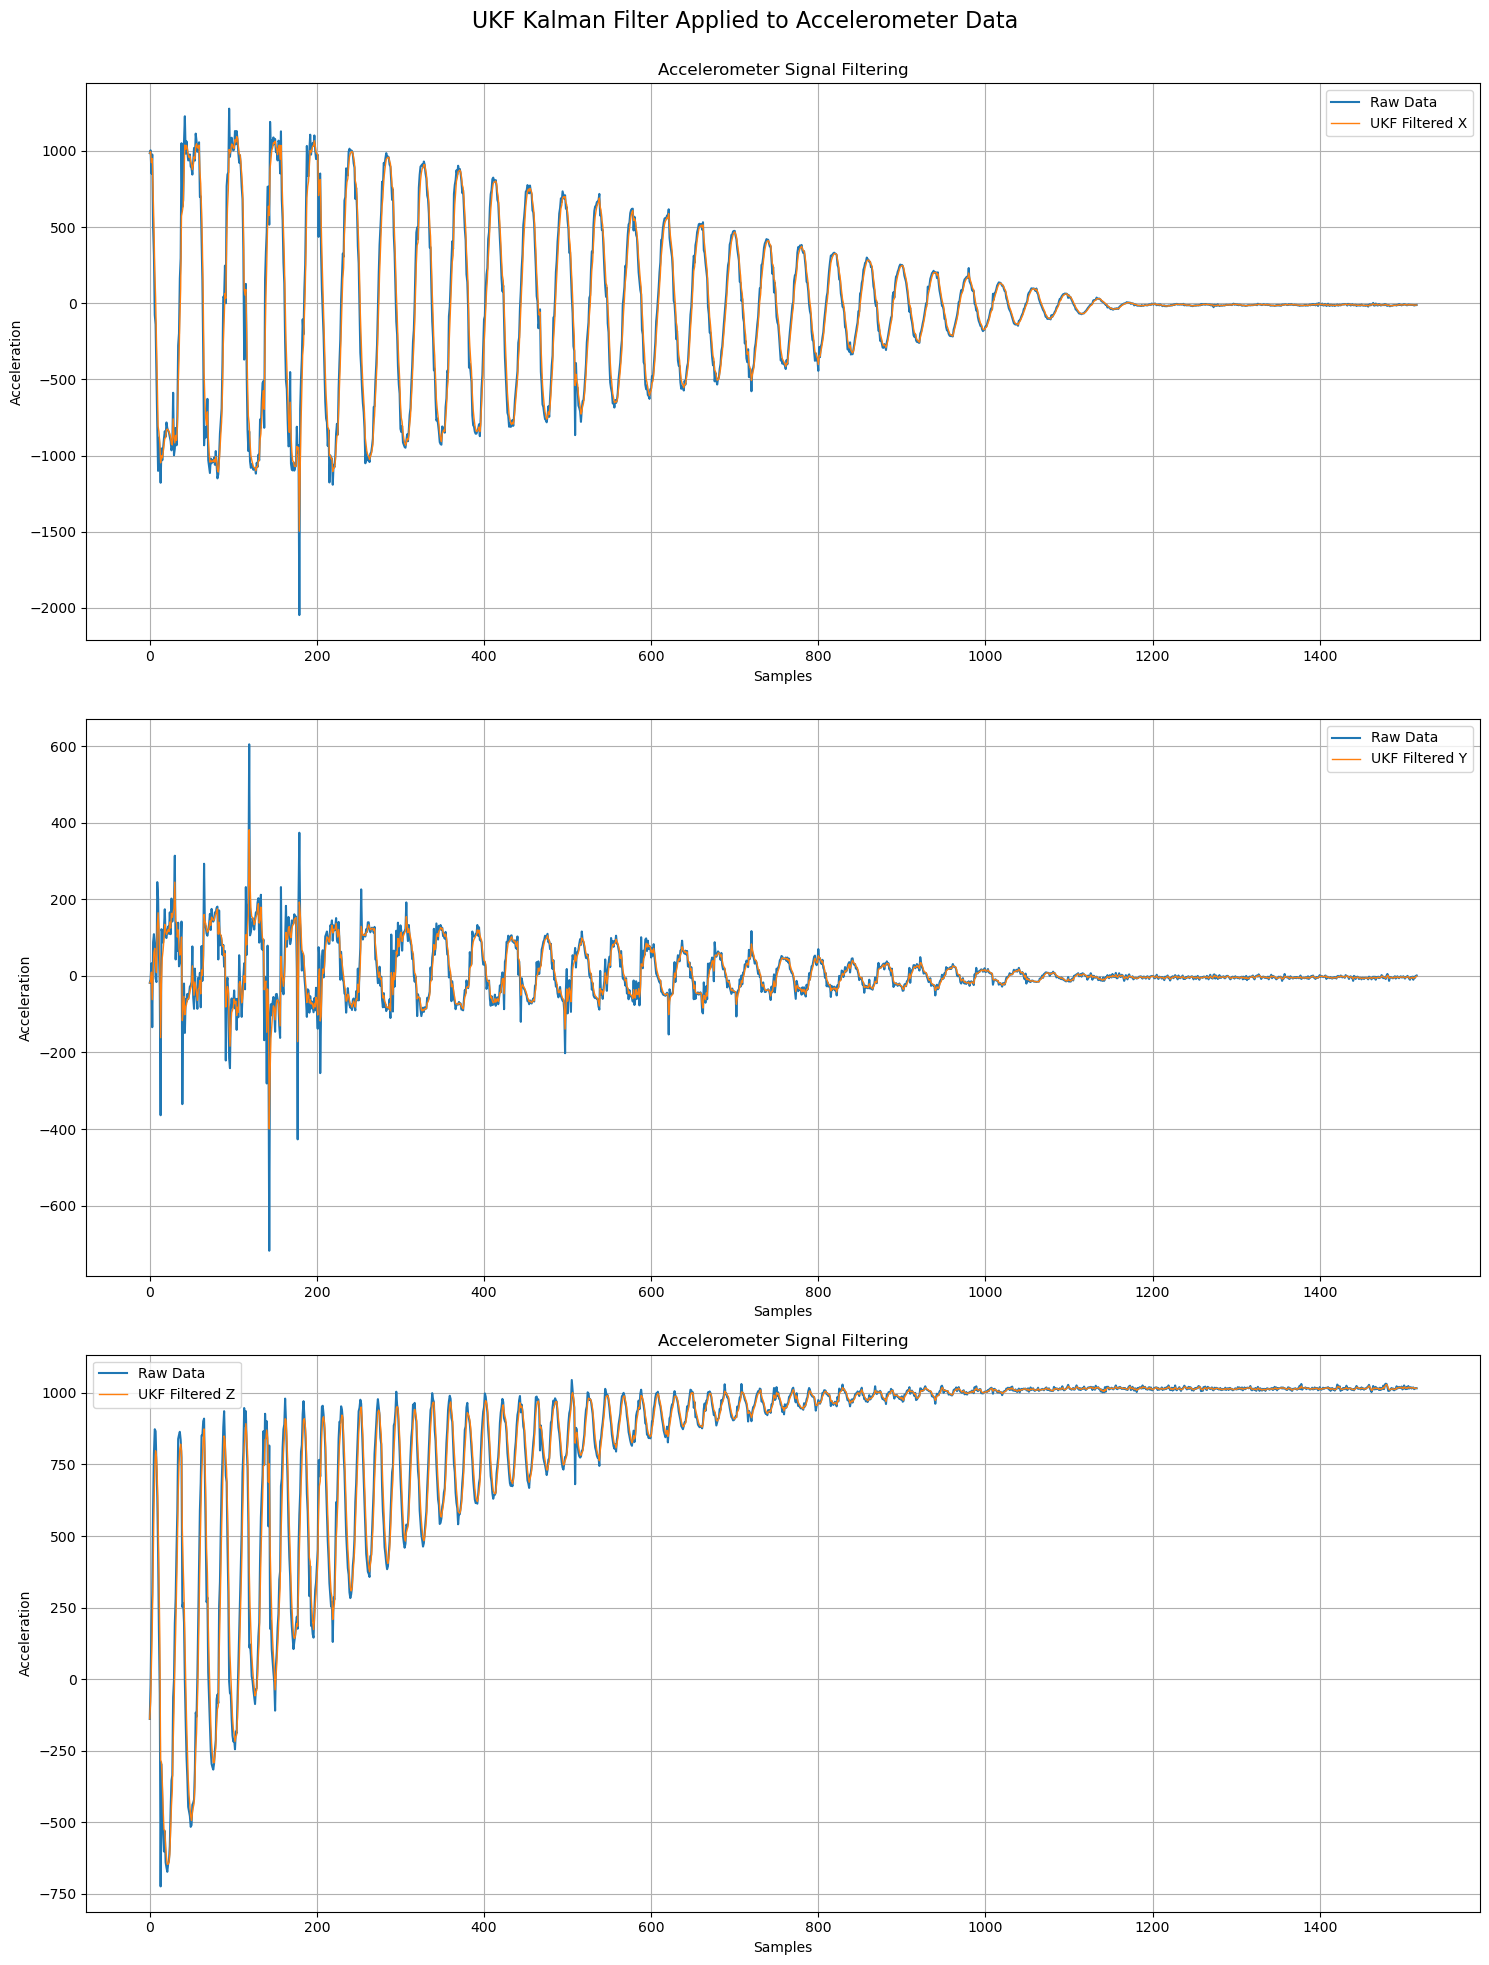

In [91]:


# filtered_ekf = ekf_filter(df['zAccl'].values)
filtered_ukf_x = ukf_filter(df['xAccl'].values)
filtered_ukf_y = ukf_filter(df['yAccl'].values)
filtered_ukf_z = ukf_filter(df['zAccl'].values)


# Plot the result
fig, ax = plt.subplots(3, 1, figsize=(15, 20))

ax[0].plot(acc_x, label='Raw Data')
ax[0].plot(filtered_ukf_x, label='UKF Filtered X', linewidth=1)
ax[0].legend()
ax[0].set_title('Accelerometer Signal Filtering')
ax[0].set_xlabel('Samples')
ax[0].set_ylabel('Acceleration')
ax[0].grid(True)

ax[1].plot(acc_y, label='Raw Data')
ax[1].plot(filtered_ukf_y, label='UKF Filtered Y', linewidth=1)
ax[1].legend()
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Acceleration')
ax[1].grid(True)

ax[2].plot(acc_z, label='Raw Data')
ax[2].plot(filtered_ukf_z, label='UKF Filtered Z', linewidth=1)
ax[2].legend()
ax[2].set_xlabel('Samples')
ax[2].set_ylabel('Acceleration')
ax[2].grid(True)
ax[2].set_title('Accelerometer Signal Filtering')

plt.suptitle('UKF Kalman Filter Applied to Accelerometer Data', fontsize=16)
plt.tight_layout( rect=[0, 0, 1, 0.98])
plt.show()
